In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv
/kaggle/input/d/nguynphcnguync/climate-change-earth-surface-temperature-data/wind_dataset.csv


## Boostrapping methods

In [5]:
wind_df = pd.read_csv("/kaggle/input/d/nguynphcnguync/climate-change-earth-surface-temperature-data/wind_dataset.csv")
wind_df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [6]:
wind = wind_df['WIND']
wind

0       13.67
1       11.50
2       11.25
3        8.63
4       11.92
        ...  
6569    14.46
6570    14.33
6571    19.17
6572    18.08
6573    19.25
Name: WIND, Length: 6574, dtype: float64

In [65]:
print("Mean of Wind: ", wind.mean())
print("Standard Deviation of Wind: ", wind.std())

Mean of Wind:  9.796834499543657
Standard Deviation of Wind:  4.977272310310808


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def bootstrap_analysis(data, sample_size=1000, num_bootstraps=1000, random_seed=42, confidence_level=0.95):
    # Lấy mẫu ngẫu nhiên từ dataset
    np.random.seed(random_seed)
    sample = np.random.choice(data, size=sample_size, replace=False)
    
    print("Mean: ", sample.mean())
    print("Standard Deviation: ", sample.std())
    
    # Bootstrapping: Tạo các mẫu bootstrap và tính toán giá trị mean, std
    boot_means = []
    boot_stds = []

    for _ in range(num_bootstraps):
        bootstrap_sample = np.random.choice(sample, size=sample_size, replace=True)
        boot_means.append(np.mean(bootstrap_sample))
        boot_stds.append(np.std(bootstrap_sample))
    
    # Tính toán SEM
    sem_boot_means = np.std(boot_means) / np.sqrt(num_bootstraps)
    sem_boot_stds = np.std(boot_stds) / np.sqrt(num_bootstraps)
    
    # Tính toán khoảng tin cậy
    def confidence_interval(data, confidence=confidence_level):
        lower_percentile = (1 - confidence) / 2 * 100
        upper_percentile = (1 + confidence) / 2 * 100
        return np.percentile(data, [lower_percentile, upper_percentile])
    
    means_ci = confidence_interval(boot_means)
    stds_ci = confidence_interval(boot_stds)
    
    # Vẽ Boxplot và Histogram cho các giá trị
    plt.figure(figsize=(15, 5))

    # Boxplot của Sample Means
    plt.subplot(1, 4, 1)
    sns.boxplot(data=boot_means, color="skyblue")
    plt.title('Boxplot of Sample Means')
    plt.ylabel('Sample Means')

    # Boxplot của Sample Standard Deviations
    plt.subplot(1, 4, 3)
    sns.boxplot(data=boot_stds, color="salmon")
    plt.title('Boxplot of Sample Standard Deviations')
    plt.ylabel('Sample Standard Deviations')

    # Histogram của Sample Means
    plt.subplot(1, 4, 2)
    plt.hist(boot_means, bins=30, color="skyblue")
    plt.title('Histogram of Sample Means')
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')

    # Histogram của Sample Standard Deviations
    plt.subplot(1, 4, 4)
    plt.hist(boot_stds, bins=30, color="salmon")
    plt.title('Histogram of Sample Standard Deviations')
    plt.xlabel('Sample Standard Deviations')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
    # Hiển thị Five-number summary cho Sample Means
    means_summary = np.percentile(boot_means, [0, 25, 50, 75, 100])
    stds_summary = np.percentile(boot_stds, [0, 25, 50, 75, 100])

    print("\nFive-number summary for Sample Means:")
    print(f"  - Minimum: {means_summary[0]}")
    print(f"  - 1st Quartile (Q1): {means_summary[1]}")
    print(f"  - Median (Q2): {means_summary[2]}")
    print(f"  - 3rd Quartile (Q3): {means_summary[3]}")
    print(f"  - Maximum: {means_summary[4]}")

    print("\nFive-number summary for Sample Std Deviations:")
    print(f"  - Minimum: {stds_summary[0]}")
    print(f"  - 1st Quartile (Q1): {stds_summary[1]}")
    print(f"  - Median (Q2): {stds_summary[2]}")
    print(f"  - 3rd Quartile (Q3): {stds_summary[3]}")
    print(f"  - Maximum: {stds_summary[4]}")
    
    # Hiển thị SEM
    print("\nStandard Errors of the Mean (SEM):")
    print(f"  - SEM of Sample Means: {sem_boot_means}")
    print(f"  - SEM of Sample Std Deviations: {sem_boot_stds}")

    # Hiển thị khoảng tin cậy
    print("\nConfidence Intervals:")
    print(f"  - 95% Confidence Interval for Sample Means: {means_ci}")
    print(f"  - 95% Confidence Interval for Sample Std Deviations: {stds_ci}")


Mean:  9.939449999999999
Standard Deviation:  5.115548552941316


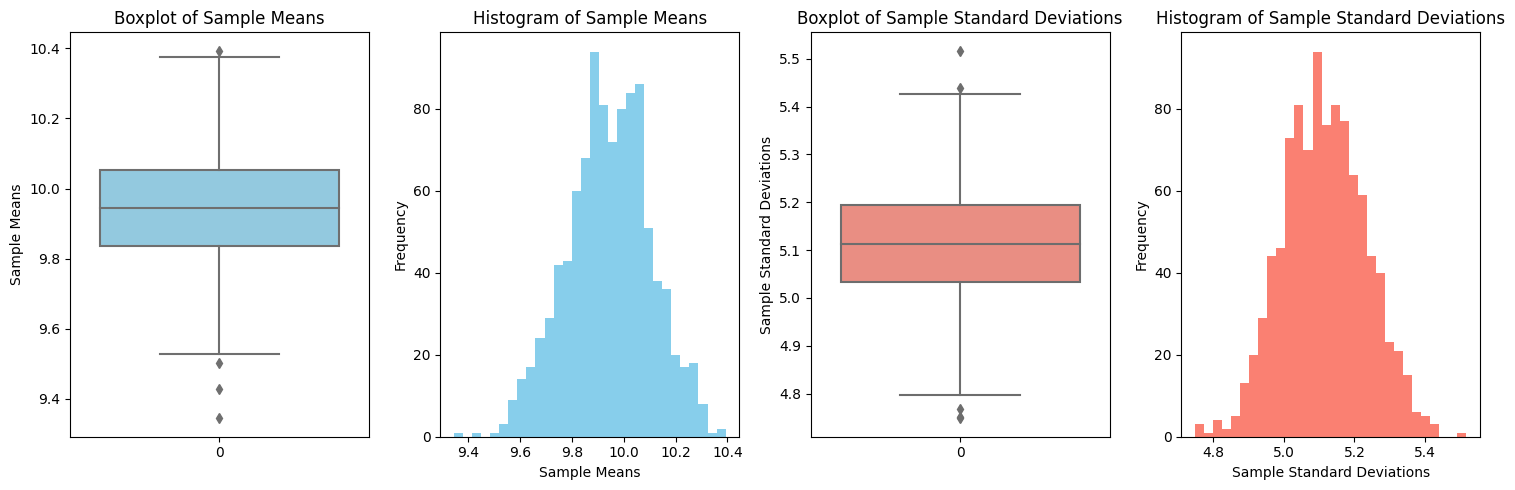


Five-number summary for Sample Means:
  - Minimum: 9.344130000000002
  - 1st Quartile (Q1): 9.8359975
  - Median (Q2): 9.944715000000002
  - 3rd Quartile (Q3): 10.05258
  - Maximum: 10.39332

Five-number summary for Sample Std Deviations:
  - Minimum: 4.748235276721237
  - 1st Quartile (Q1): 5.0324500027980505
  - Median (Q2): 5.112450079977565
  - 3rd Quartile (Q3): 5.19384694731791
  - Maximum: 5.516852730597401

Standard Errors of the Mean (SEM):
  - SEM of Sample Means: 0.005114806140802983
  - SEM of Sample Std Deviations: 0.003687259694274663

Confidence Intervals:
  - 95% Confidence Interval for Sample Means: [ 9.61997    10.25949075]
  - 95% Confidence Interval for Sample Std Deviations: [4.89603144 5.34447396]


In [118]:
bootstrap_analysis(wind)

In [46]:
GlobalLandTemperaturesByCountry = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")
GlobalLandTemperaturesByCountry['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [47]:
poland_data = GlobalLandTemperaturesByCountry[GlobalLandTemperaturesByCountry['Country'] == 'Poland']
poland_data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
413621,1743-11-01,3.937,2.057,Poland
413622,1743-12-01,NaN,NaN,Poland
413623,1744-01-01,NaN,NaN,Poland
413624,1744-02-01,NaN,NaN,Poland
413625,1744-03-01,NaN,NaN,Poland
...,...,...,...,...
416855,2013-05-01,14.957,0.232,Poland
416856,2013-06-01,17.811,0.209,Poland
416857,2013-07-01,19.584,0.417,Poland
416858,2013-08-01,19.148,0.340,Poland


In [48]:
Poland_AverageTemperature = poland_data['AverageTemperature']
Poland_AverageTemperature

413621     3.937
413622       NaN
413623       NaN
413624       NaN
413625       NaN
           ...  
416855    14.957
416856    17.811
416857    19.584
416858    19.148
416859       NaN
Name: AverageTemperature, Length: 3239, dtype: float64

In [49]:
print("Mean of Average Temperature: ", Poland_AverageTemperature.mean())
print("Standard Deviation of Average Temperature: ", Poland_AverageTemperature .std())

Mean of Average Temperature:  7.46020593809223
Standard Deviation of Average Temperature:  8.18523394742055


Mean:  7.5141539999999996
Standard Deviation:  8.18962026850354


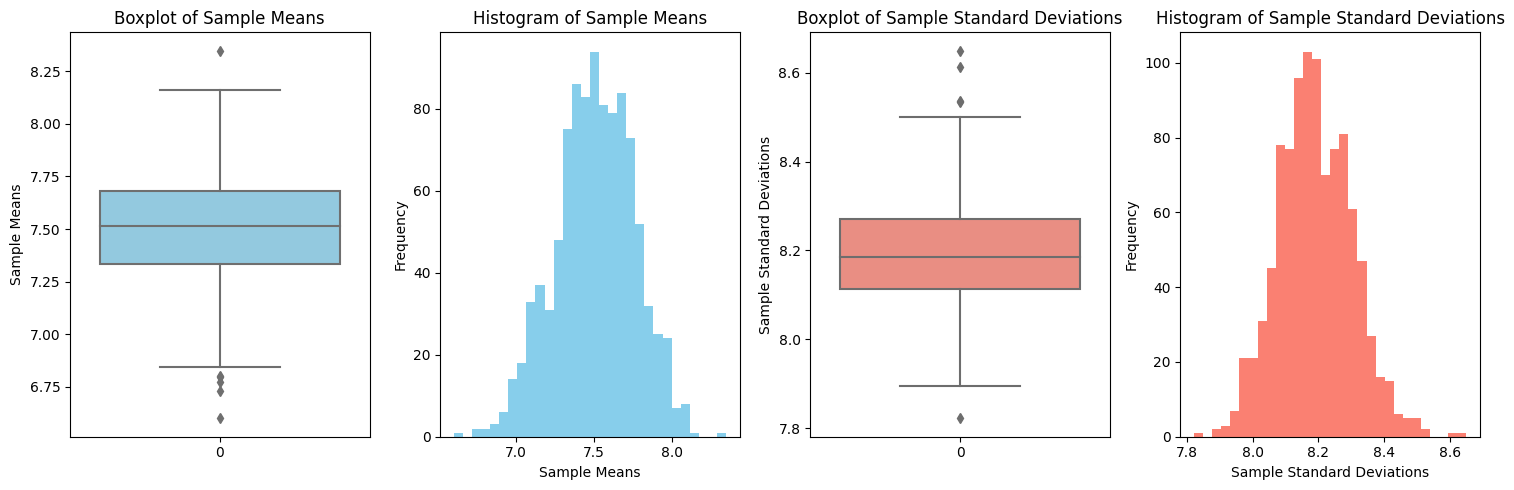


Five-number summary for Sample Means:
  - Minimum: 6.599417
  - 1st Quartile (Q1): 7.3355215
  - Median (Q2): 7.51439
  - 3rd Quartile (Q3): 7.68018475
  - Maximum: 8.348122

Five-number summary for Sample Std Deviations:
  - Minimum: 7.82186777026504
  - 1st Quartile (Q1): 8.113704483529942
  - Median (Q2): 8.185514940994844
  - 3rd Quartile (Q3): 8.26997595566387
  - Maximum: 8.64970349539081

Standard Errors of the Mean (SEM):
  - SEM of Sample Means: 0.00800671107485158
  - SEM of Sample Std Deviations: 0.003551251692892569

Confidence Intervals:
  - 95% Confidence Interval for Sample Means: [6.99944128 7.98846583]
  - 95% Confidence Interval for Sample Std Deviations: [7.97841544 8.41642374]


In [119]:
bootstrap_analysis(Poland_AverageTemperature.dropna())

## Jackknife method

In [83]:
print("Mean of Wind: ", wind.mean())
print("Standard Deviation of Wind: ", wind.std())

Mean of Wind:  9.796834499543657
Standard Deviation of Wind:  4.977272310310808


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

def jackknife_analysis(data, sample_size=1000, confidence_level=0.95):
    # Đặt seed để đảm bảo tính tái lập
    np.random.seed(0)
    
    # Tạo một sample ngẫu nhiên từ biến data với kích thước sample_size
    first_sample = np.random.choice(data, size=sample_size, replace=False)
    
    # Tạo resamplings bằng cách loại bỏ lần lượt từng phần tử trong first_sample
    resamplings = [np.delete(first_sample, i) for i in range(sample_size)]
    
    print("Mean: ", np.mean(resamplings))
    print("Standard Deviation: ", np.std(resamplings))
    
    # Tính toán giá trị mean và std cho mỗi resampling
    resampling_means = np.array([np.mean(sample) for sample in resamplings])
    resampling_stds = np.array([np.std(sample, ddof=1) for sample in resamplings])

    # Tính toán SEM
    sem_jackknife_means = np.std(resampling_means) / np.sqrt(sample_size - 1)
    sem_jackknife_stds = np.std(resampling_stds) / np.sqrt(sample_size - 1)
    
    # Tính toán khoảng tin cậy
    def confidence_interval(data, confidence=confidence_level):
        lower_percentile = (1 - confidence) / 2 * 100
        upper_percentile = (1 + confidence) / 2 * 100
        return np.percentile(data, [lower_percentile, upper_percentile])
    
    means_ci = confidence_interval(resampling_means)
    stds_ci = confidence_interval(resampling_stds)
    
    # Vẽ các biểu đồ Boxplot và Histogram
    plt.figure(figsize=(15, 5))

    # Boxplot của Sample Means
    plt.subplot(1, 4, 1)
    sns.boxplot(data=resampling_means, color="skyblue")
    plt.title('Boxplot of Sample Means')
    plt.ylabel('Sample Means')

    # Boxplot của Sample Standard Deviations
    plt.subplot(1, 4, 3)
    sns.boxplot(data=resampling_stds, color="salmon")
    plt.title('Boxplot of Sample Standard Deviations')
    plt.ylabel('Sample Standard Deviations')

    # Histogram của Sample Means
    plt.subplot(1, 4, 2)
    plt.hist(resampling_means, bins=30, color="skyblue")
    plt.title('Histogram of Sample Means')
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')

    # Histogram của Sample Standard Deviations
    plt.subplot(1, 4, 4)
    plt.hist(resampling_stds, bins=30, color="salmon")
    plt.title('Histogram of Sample Standard Deviations')
    plt.xlabel('Sample Standard Deviations')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Hiển thị Five-number summary cho Sample Means
    means_summary = np.percentile(resampling_means, [0, 25, 50, 75, 100])
    stds_summary = np.percentile(resampling_stds, [0, 25, 50, 75, 100])

    print("\nFive-number summary for Sample Means:")
    print(f"  - Minimum: {means_summary[0]}")
    print(f"  - 1st Quartile (Q1): {means_summary[1]}")
    print(f"  - Median (Q2): {means_summary[2]}")
    print(f"  - 3rd Quartile (Q3): {means_summary[3]}")
    print(f"  - Maximum: {means_summary[4]}")

    print("\nFive-number summary for Sample Std Deviations:")
    print(f"  - Minimum: {stds_summary[0]}")
    print(f"  - 1st Quartile (Q1): {stds_summary[1]}")
    print(f"  - Median (Q2): {stds_summary[2]}")
    print(f"  - 3rd Quartile (Q3): {stds_summary[3]}")
    print(f"  - Maximum: {stds_summary[4]}")

    # Hiển thị SEM
    print("\nStandard Errors of the Mean (SEM):")
    print(f"  - SEM of Sample Means: {sem_jackknife_means}")
    print(f"  - SEM of Sample Std Deviations: {sem_jackknife_stds}")

    # Hiển thị khoảng tin cậy
    print("\nConfidence Intervals:")
    print(f"  - 95% Confidence Interval for Sample Means: {means_ci}")
    print(f"  - 95% Confidence Interval for Sample Std Deviations: {stds_ci}")


Mean:  9.90225
Standard Deviation:  4.982572210966943


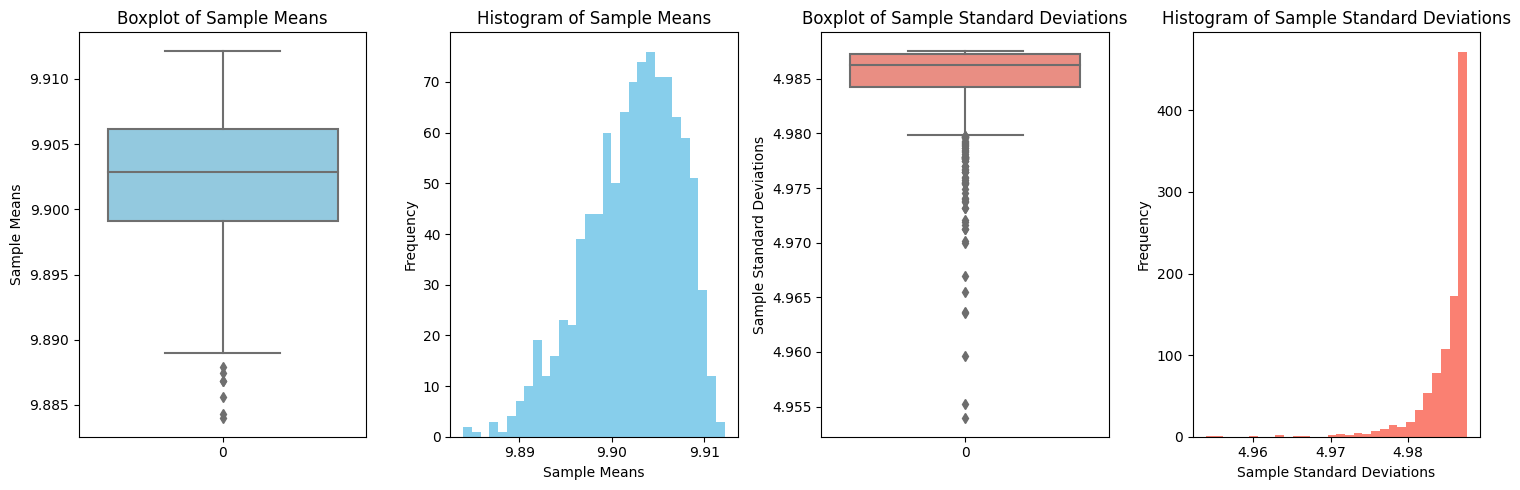


Five-number summary for Sample Means:
  - Minimum: 9.883973973973974
  - 1st Quartile (Q1): 9.899099099099098
  - Median (Q2): 9.902842842842844
  - 3rd Quartile (Q3): 9.906156156156156
  - Maximum: 9.912162162162161

Five-number summary for Sample Std Deviations:
  - Minimum: 4.953930720396512
  - 1st Quartile (Q1): 4.984261097639843
  - Median (Q2): 4.986287765211566
  - 3rd Quartile (Q3): 4.987262104193158
  - Maximum: 4.987562237834699

Standard Errors of the Mean (SEM):
  - SEM of Sample Means: 0.00015779940785630664
  - SEM of Sample Std Deviations: 0.00011224914144192358

Confidence Intervals:
  - 95% Confidence Interval for Sample Means: [9.89131006 9.90982983]
  - 95% Confidence Interval for Sample Std Deviations: [4.97553767 4.98755909]


In [112]:
jackknife_analysis(wind)

In [113]:
Poland_AverageTemperature

413621     3.937
413622       NaN
413623       NaN
413624       NaN
413625       NaN
           ...  
416855    14.957
416856    17.811
416857    19.584
416858    19.148
416859       NaN
Name: AverageTemperature, Length: 3239, dtype: float64

Mean:  7.739284000000002
Standard Deviation:  8.18103031966903


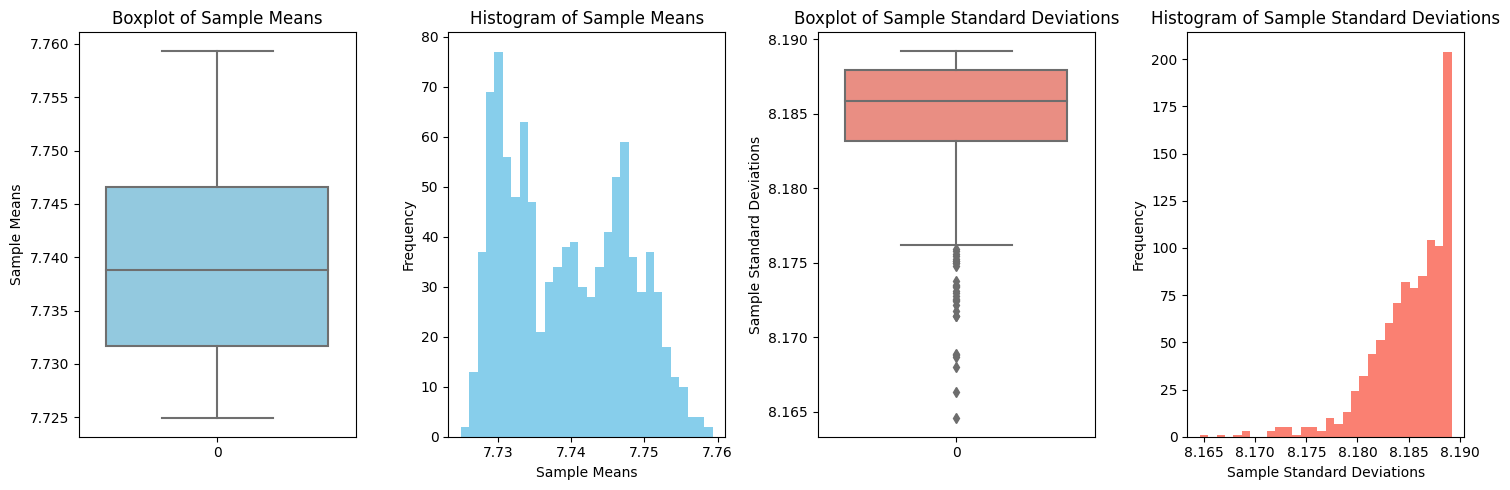


Five-number summary for Sample Means:
  - Minimum: 7.724907907907908
  - 1st Quartile (Q1): 7.731683933933934
  - Median (Q2): 7.738806306306307
  - 3rd Quartile (Q3): 7.746540290290291
  - Maximum: 7.759351351351352

Five-number summary for Sample Std Deviations:
  - Minimum: 8.164574806026465
  - 1st Quartile (Q1): 8.183156438351439
  - Median (Q2): 8.185869028093812
  - 3rd Quartile (Q3): 8.187963682988729
  - Maximum: 8.189223478234982

Standard Errors of the Mean (SEM):
  - SEM of Sample Means: 0.0002590954401537368
  - SEM of Sample Std Deviations: 0.00011791789872886921

Confidence Intervals:
  - 95% Confidence Interval for Sample Means: [7.727698   7.75439352]
  - 95% Confidence Interval for Sample Std Deviations: [8.17525886 8.1892146 ]


In [115]:
jackknife_analysis(Poland_AverageTemperature.dropna())